# Description

## Dataset1
数据集ex1data1.txt中包含了97份数据，数据的构成如下所示：

|  | 城市面积 | 利润 |
| ----------- | ----------- | ----------- |
| 样本1 | 6.1101 | 17.592 |
| 样本2 | 5.5277 | 5.5277 |


其中第一列代表餐厅所在城市面积大小，第二列表示餐厅一年的利润，试用线性模型（一元线性回归）对两者之间的关系进行拟合。

## Dataset2

数据集ex1data2.txt中包含了47份数据，数据的构成如下所示：

|  | 面积大小 | 卧室数量 | 价格 |
| ----------- | ----------- | ----------- | ----------- |
| 样本1 | 2104 | 3 | 399900 |
| 样本2 | 1600 | 3 | 329900 |

其中第一列代表房屋占地面积，第二列代表拥有卧室数量，第三列代表房屋成交价格，试用线性模型（多元线性回归）对房屋成交价格进行拟合。

## Requirements

1. 可视化数据集的样本分布结果
2. 可视化线性回归拟合结果
3. 预测在面积大小为3.1415的城市开一家餐厅的预计利润，以及面积为2000卧室数量为1的房屋的成交价格
4. 完成实验报告

# Solution

In [63]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

## Dataset1

### Visualizing Data Distribution

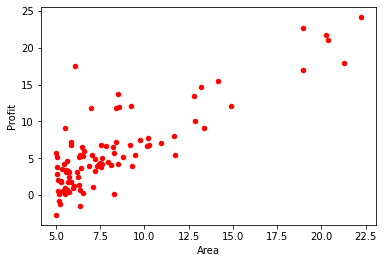

In [64]:
df1 = pd.read_csv('ex1data1.txt', sep=',', header=None)
df1 = df1.set_axis(['Area', 'Profit'], axis=1, inplace=False)

df1.plot(kind='scatter', x='Area', y='Profit', color='red')

plt.show()

### Pre-processing data

In [65]:
xs = np.array(df1['Area'])
ys = np.array(df1['Profit'])
w = 0 # parameter to learn
b = 0 # parameter to learn

### Model

In [66]:
def predict(x):
    y_pred = w * x + b
    return y_pred

def cost():
    l = 0
    for x, y in zip(np.array(df1['Area']), np.array(df1['Profit'])):
        l += (y - predict(x)) ** 2 
    return l / len(np.array(df1['Area']))
    
def gradient_w() :
    return (2 * x * (w * x + b - y))

def gradient_b() :
    return  (2  * (w * x + b - y))


### Learn

In [67]:
for epoch in range(1000):
    for x, y in zip(np.array(df1['Area']), np.array(df1['Profit'])):
        # 计算梯度
        grad_w = gradient_w()
        grad_b = gradient_b()
        # 根据学习率更新参数
        w -= 0.0001 * grad_w # 学习率
        b -= 0.0001 * grad_b
        # print('\tgrad:', x, y, grad_w, grad_b )
    else:
        # 每个epoch打印参数及loss
        l = cost()
        print('progress:', epoch, 'w=', w,'b=',b, 'loss', l)

progress: 0 w= 0.5799039986265245 b= 0.04410515563128402 loss 15.656042984860848
progress: 1 w= 0.6949377510042992 b= 0.04180364810489249 loss 12.647249010744385
progress: 2 w= 0.7186483706917323 b= 0.03042476350103291 loss 12.292477646176314
progress: 3 w= 0.7244155249804393 b= 0.01730133563741258 loss 12.216777135933274
progress: 4 w= 0.726653941082169 b= 0.003873691047964628 loss 12.186643678252572
progress: 5 w= 0.728195264119961 b= -0.009575368302227171 loss 12.165206745527506
progress: 6 w= 0.7295957567131031 b= -0.022990424274513307 loss 12.14557144889323
progress: 7 w= 0.7309647049376281 b= -0.03636072556565025 loss 12.126396339649604
progress: 8 w= 0.7323235906789627 b= -0.04968429475523534 loss 12.107417740972199
progress: 9 w= 0.7336766475051549 b= -0.06296087749018532 loss 12.088583147310416
progress: 10 w= 0.7350247206738048 b= -0.07619055742311487 loss 12.069881510918357
progress: 11 w= 0.7363679897941595 b= -0.08937348413229025 loss 12.05130993035792
progress: 12 w= 0.73

### Visualizing Model

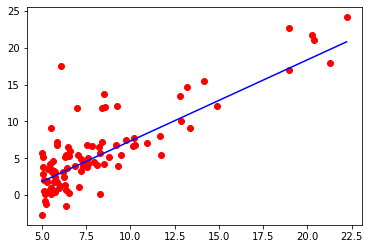

In [68]:
x_axis = np.linspace(min(xs),max(xs),100)
y_axis = predict(x_axis)

plt.plot(x_axis,y_axis,label='result',color='blue')
plt.scatter(xs,ys,color='red')

## Dataset2

### Visualizing Data Distribution

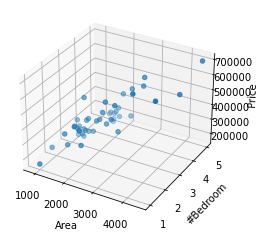

In [69]:
df1 = pd.read_csv('ex1data2.txt', sep=',', header=None)
df1 = df1.set_axis(['Area', '#Bedrooms', 'Price'], axis=1, inplace=False)

xs = np.array(df1['Area'])
ys = np.array(df1['#Bedrooms'])
zs = np.array(df1['Price'])


fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(xs, ys, zs, marker='o')
ax.set_xlabel('Area')
ax.set_ylabel('#Bedroom')
ax.set_zlabel('Price')

plt.show()

### Pre-processing data

In [70]:
w = np.ones((3,1))
X = np.array([(xs - xs.mean()) / xs.std(), (ys - ys.mean()) / ys.std(), np.ones(len(xs))]) # normalizing data
Z = np.array([(zs-zs.mean())/zs.std()])
print(X.shape)
print(Z.shape)

(3, 47)
(1, 47)


### Model


In [71]:
def predict_vec(x) :
    return x.T.dot(w) # applying matrix dot multiply

def cost_vec():
    z_pred = predict_vec(X)
    return ((Z-z_pred)**2).mean()
    
def gradient_vec(X) :
    return (2 * X.dot(predict_vec(X) - Z.T)) / len(xs)


In [72]:
for epoch in range(1000):
    for _ in range(len(Z)):
        # 计算梯度
        grad_vec = gradient_vec(X)
        # 根据学习率更新参数
        w -= 0.01 * grad_vec
    else:
        # 每个epoch打印参数及loss
        l = cost_vec()
        print('progress:', epoch, 'loss', l)

progress: 0 loss 4.967652702789083
progress: 1 loss 4.822461669327377
progress: 2 loss 4.684005614283007
progress: 3 loss 4.551947913734388
progress: 4 loss 4.425969940219578
progress: 5 loss 4.305770051565252
progress: 6 loss 4.191062638461146
progress: 7 loss 4.081577227293469
progress: 8 loss 3.977057634960546
progress: 9 loss 3.8772611725908384
progress: 10 loss 3.7819578952685617
progress: 11 loss 3.6909298950459184
progress: 12 loss 3.6039706346842446
progress: 13 loss 3.5208843197197592
progress: 14 loss 3.4414853065937536
progress: 15 loss 3.3655975447224056
progress: 16 loss 3.2930540505086388
progress: 17 loss 3.2236964114179547
progress: 18 loss 3.1573743183524443
progress: 19 loss 3.093945124662712
progress: 20 loss 3.0332734302365605
progress: 21 loss 2.975230689196451
progress: 22 loss 2.9196948398252798
progress: 23 loss 2.8665499554222547
progress: 24 loss 2.815685914867975
progress: 25 loss 2.7669980917504153
progress: 26 loss 2.720387060971813
progress: 27 loss 2.6757

### Visualizing Data

In [73]:
def output_prediction(x,y):
    # 将待预测的数据进行标准化
    x = (x - xs.mean())/xs.std()
    y = (y - ys.mean())/ys.std()
    # 返回值进行标准化的逆操作
    return predict_vec(np.array([x,y,np.ones(len(x))])) * zs.std() + zs.mean()

In [74]:
# x轴与y轴分别描100个点
x_ax = np.linspace(min(xs),max(xs),100)
y_ax = np.linspace(min(ys),max(ys),100)

# 计算预测值
z_ax = []
for i in range(len(x_ax)):
    z_ax.extend(
        output_prediction(
            np.repeat(x_ax[i], len(y_ax))
            ,y_ax
        )
    )

Text(0.5, 0, 'Price')

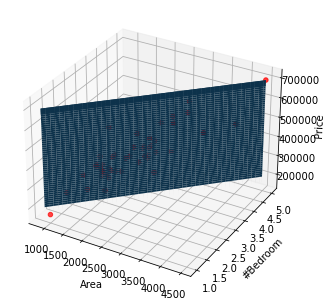

In [75]:
#绘图
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)

ax.plot_surface(x_ax, y_ax, np.array(z_ax))
ax.scatter(xs, ys, zs, marker='o',color='red')
ax.set_xlabel('Area')
ax.set_ylabel('#Bedroom')
ax.set_zlabel('Price')